In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn import neighbors

from sklearn import linear_model
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import pipeline
from sklearn import preprocessing

import warnings
from os import environ

In [2]:
SEED = 42
np.random.seed(SEED)
kf = model_selection.RepeatedKFold(n_repeats=5, n_splits=5, random_state=SEED)

In [3]:
df = pd.read_csv('logP.csv')

y = df.logP
X = df.iloc[:, 3:]
X_norm = preprocessing.StandardScaler().fit_transform(X)

X_new = pd.DataFrame(X_norm, columns = X.columns)

## knn

In [18]:
param_grid_knn = {
    "kNN__n_neighbors": [*np.arange(1, 20,  1), *np.arange(20, 200, 10)],
    "kNN__weights" : ['uniform', 'distance'],
    'kNN__p' : np.linspace(0.1, 5, 10)
}

In [19]:
pipe = pipeline.Pipeline(
    [
        ("kNN", neighbors.KNeighborsRegressor()),
    ]
)

In [20]:
search_knn = model_selection.GridSearchCV(
    pipe,
    param_grid_knn,
    cv=kf,
    n_jobs=-1,
    verbose=3,
)

In [ ]:
search_knn.fit(X_new, y)

In [22]:
search_knn.best_params_

{'kNN__n_neighbors': 19,
 'kNN__p': 0.6444444444444445,
 'kNN__weights': 'uniform'}

In [78]:
res = search_knn.cv_results_
xx = res['param_kNN__n_neighbors'].data
yy = res['mean_test_score']
xfp = res['param_kNN__p'].data
xfw = res['param_kNN__weights'].data

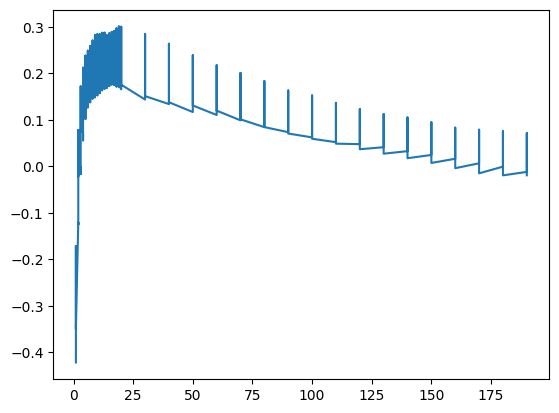

In [79]:
plt.plot(
    xx, yy
)

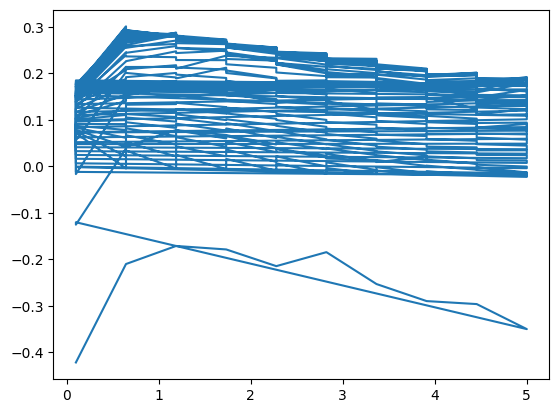

In [80]:
plt.plot(xfp,  yy)

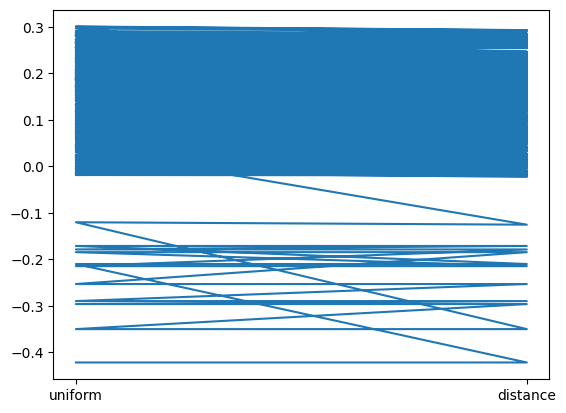

In [81]:
plt.plot(xfw, yy)

In [67]:
search_knn.best_score_

0.3011633128124281

<Axes: ylabel='score'>

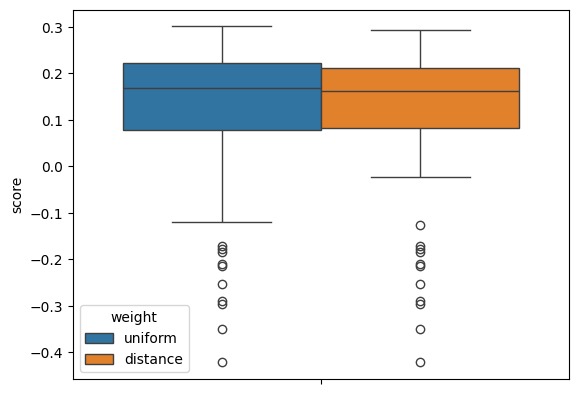

In [103]:
DataW = pd.DataFrame({'score': yy, 'weight': xfw})
sns.boxplot(data = DataW, y = 'score', hue = 'weight')

In [101]:
DataW

,score,weight
0,-0.422015,uniform
1,-0.422015,distance
2,-0.210098,uniform
3,-0.210098,distance
4,-0.171244,uniform
...,...,...
735,-0.013193,distance
736,-0.016981,uniform
737,-0.016387,distance
738,-0.017598,uniform


## SVR

In [ ]:
select_svm = feature_selection.SequentialFeatureSelector(svm.SVR(), n_jobs=-1, direction='backward', cv=kf)
select_svm.fit(X_new, y)

X_sel_feat_svm_names = X_new.columns[select_svm.get_support()]
X_sel_feat_svm = X_new[X_sel_feat_svm_names]
X_sel_feat_svm
